#  SWMAL Opgave

## Dataanalyse

### Qa) Beskrivelse af datasæt til O4 projekt

I kurset er slutprojektet et bærende element, som I forventes at arbejde på igennem hele kurset
sideløbende med de forskellige undervisningsemner. 

I skal selv vælge et O4 projekt–det anbefales at I vælger en problemstilling, hvor der allerede er data til rådighed og en god beskrivelse af data, dataopsamlingsmetode og problemstilling.

I denne opgave skal I:

* a) Give en kort konceptmæssig projektbeskrivelse af Jeres ide til O4 projekt. 

* b) Beskrive jeres valgte datasæt med en kort forklaring af baggrund og hvor I har fået data fra.

* c) Beskrive data–dvs. hvilke features, antal samples, target værdier, evt. fejl/usikkerheder, etc.

* d) Forklare hvordan I ønsker at anvende datasættet – vil I fx. bruge det til at prædiktere noget
bestemt, lave en regression eller klassifikation, el.lign. 

I vil nok komme til at anvende data også på andre måder i løbet af undervisningen – men det behøver I ikke nævne. Og det er også ok, hvis I ender med at bruge data på en anden måde end planlagt her.

Omfang af beskrivelsen forventes at være 1-2 sider.



### Qb) Dataanalyse af eget datasæt

Lav data analyse på jeres egne data og projekt.

Det indebærer de sædvanlige elementer såsom plotte histogrammer, middelværdi/median/spredning, analysere for outliers/korrupte data, forslag til skalering af data og lignende former for analyse af data.

For nogle typer data (fx billed-data), hvor features ikke har en specifik betydning, er det mest
histogrammer og lignende, som giver mening – det er helt o.k. 


#### NOTE vdr. billeddatasæts

For billeddata fer hver pixel en feature, og alm. analyse beskrevet ovenfor giver ikke indsigt. Prøv i stedet for billeder at beskrive billedformater (JPEG, PNG osv. / RGB, HSV, gråtone, multispektral, etc.), størrelser af billeder, hvordan de er repræsenteret på disk (dirs osv.)

Giv også eksempler på billeder og evt. labels i billedesæt.

Histogrammer kan udføres på enkelte billeder, men kun i forbindelse med labelede områder---og bedst på billesæt med ens baggrunde.

Benytter i lyddata eller video gælder de samme begrænsinger som får billeder her.

### NOTE vdr. valg af datasæt til O4

I har frie hænder til at vælge O4 projekt og tilhørende datasæt og valg af datasæt og ide til O4 her er ikke endelig. 

Dvs. at i løbende kan modificere projektbeskrivelse og, evt. om nødvendigt, vælge et andet datasæt senere, hvis jeres nuværende valg viser sig umuligt (men er en dyr proces). 

Scope af O4 projekt bør også begrænses, så det passer til kurset og til den '_time-box_'ede aflevering.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

try: 
    bmw_data = pd.read_csv('./Data/bmw.csv')
except FileNotFoundError:
    print("File not found")
    exit(1)

print(bmw_data.head(10))
bmw_data.describe()

# Get unique counts for model, transmission and fuelType
print("Unique values count:")
print(f"Models: {bmw_data['model'].unique()}")
print(f"Transmissions: {bmw_data['transmission'].unique()}")
print(f"Fuel Types: {bmw_data['fuelType'].unique()}")



       model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   
5   5 Series  2016  14900    Automatic    35309   Diesel  125  60.1   
6   5 Series  2017  16000    Automatic    38538   Diesel  125  60.1   
7   2 Series  2018  16250       Manual    10401   Petrol  145  52.3   
8   4 Series  2017  14250       Manual    42668   Diesel   30  62.8   
9   5 Series  2016  14250    Automatic    36099   Diesel   20  68.9   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0  
5         2.0  
6         2.0  
7         1.5  
8         2.0  
9         2.0  
Unique values count:
Models: 24
Transmissi

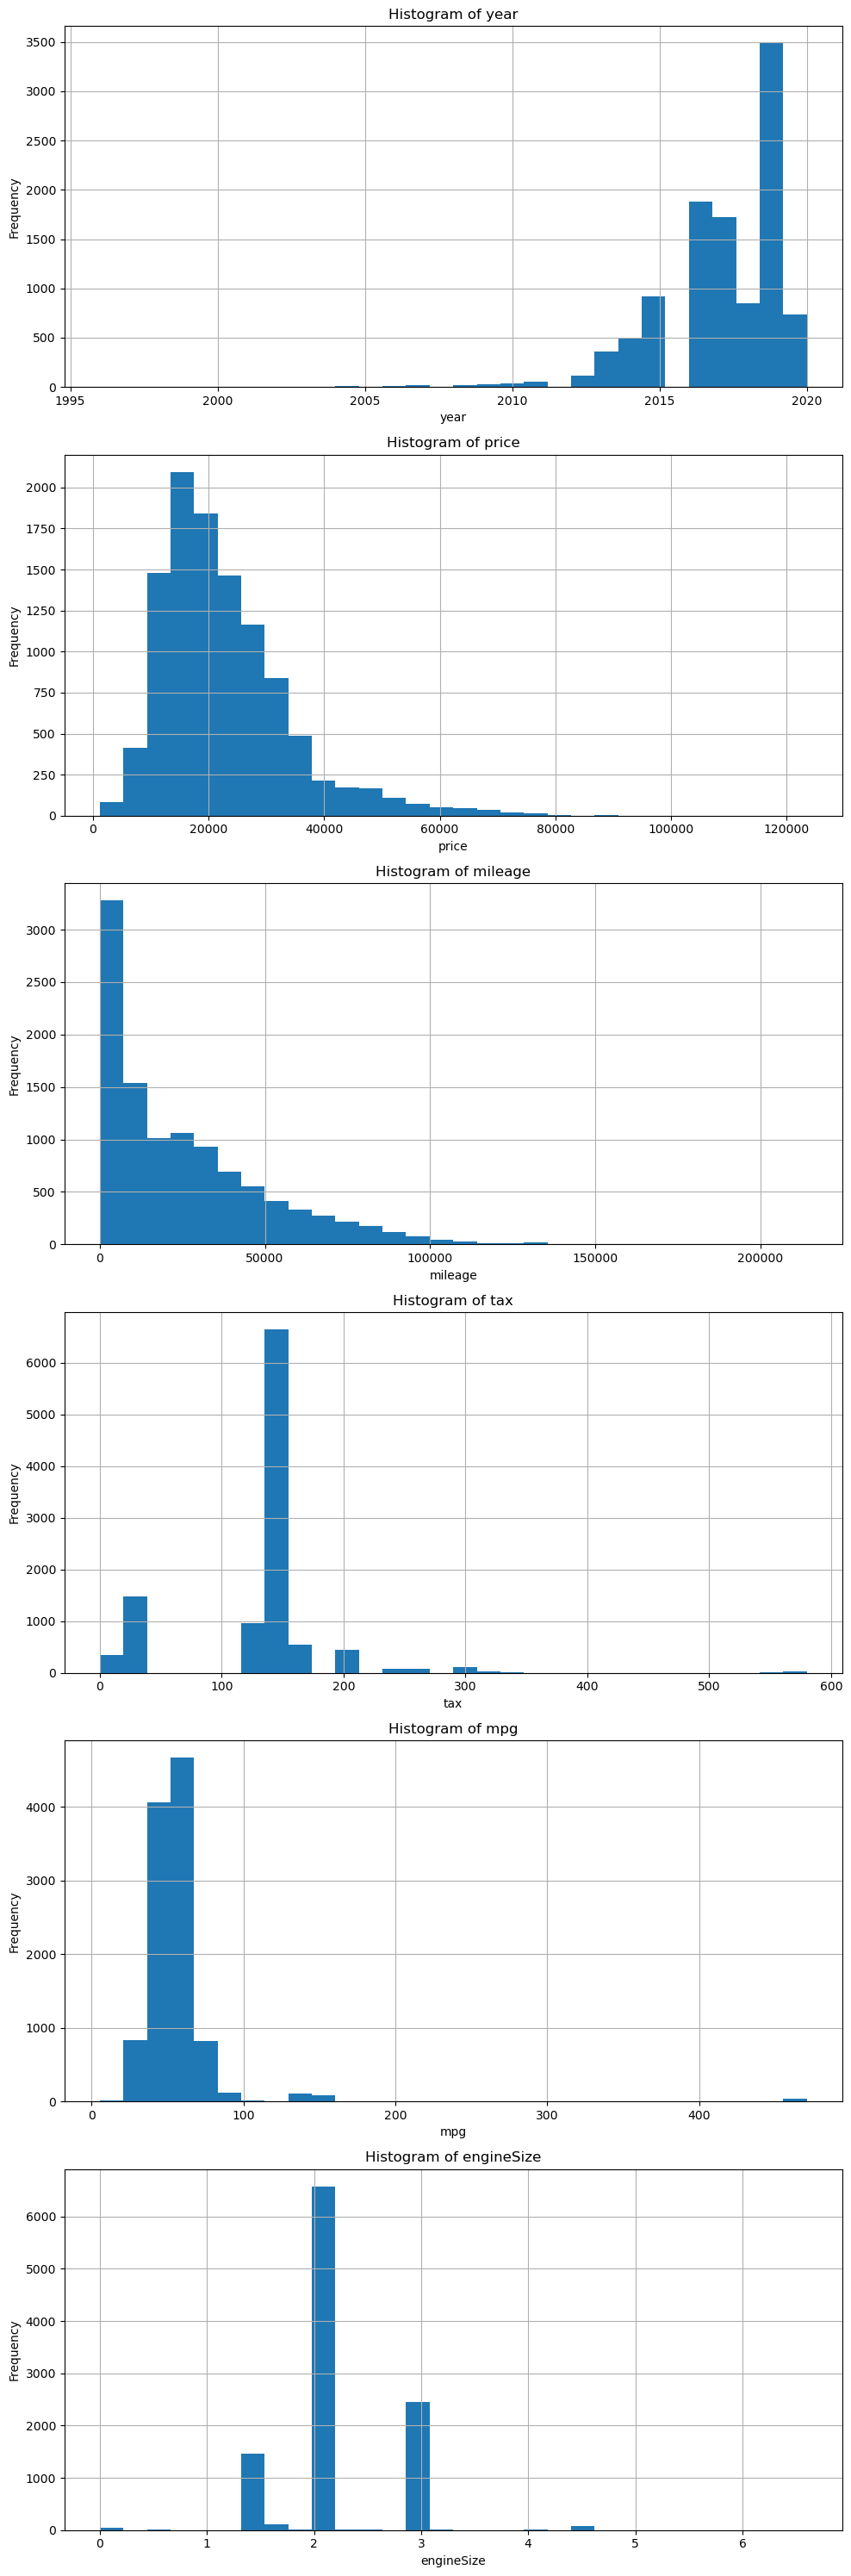

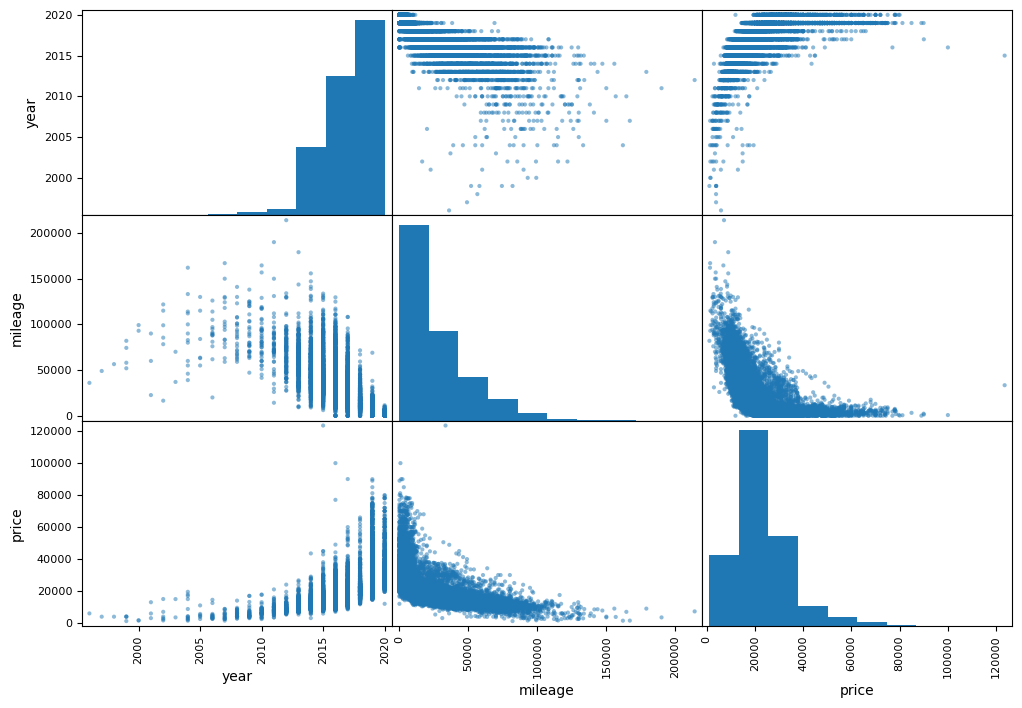

Statistical Analysis:
               year         price       mileage         tax        mpg  \
mean    2017.078935  22733.408867  25496.986550  131.702068  56.399035   
median  2017.000000  20462.000000  18347.000000  145.000000  53.300000   
std        2.349038  11415.528189  25143.192559   61.510755  31.336958   

        engineSize  
mean      2.167767  
median    2.000000  
std       0.552054  

Analysis:

Column: year
  Mean: 2017.08 - Represents the average value
  Median: 2017.00 - Represents the middle value
  Std Dev: 2.35 - Indicates data spread

Column: price
  Mean: 22733.41 - Represents the average value
  Median: 20462.00 - Represents the middle value
  Std Dev: 11415.53 - Indicates data spread
  * Warning: Potential skewness detected (mean and median differ significantly)

Column: mileage
  Mean: 25496.99 - Represents the average value
  Median: 18347.00 - Represents the middle value
  Std Dev: 25143.19 - Indicates data spread
  * Warning: Potential skewness detected (m

In [17]:

#Plot histograms to visualize data distributions
# Get numerical columns
num_cols = bmw_data.select_dtypes(include=['float64', 'int64']).columns
# Set up subplots
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(10, 5*len(num_cols)))
# Plot histograms for each numerical column
for i, col in enumerate(num_cols):
    ax = axes[i] if len(num_cols) > 1 else axes
    bmw_data[col].hist(ax=ax, bins=30)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

attributes = ["model", "year", "mileage",
"price"]
scatter_matrix(bmw_data[attributes], figsize=(12, 8))
plt.show()



#Calculate and analyze mean, median, and standard deviation
# Calculate basic statistics for numerical columns
stats = bmw_data[num_cols].agg(['mean', 'median', 'std'])

print("Statistical Analysis:")
print(stats)
# Analyze the statistics
print("\nAnalysis:")
for col in num_cols:
    print(f"\nColumn: {col}")
    print(f"  Mean: {stats[col]['mean']:.2f} - Represents the average value")
    print(f"  Median: {stats[col]['median']:.2f} - Represents the middle value")
    print(f"  Std Dev: {stats[col]['std']:.2f} - Indicates data spread")
    
    # Check for potential skewness
    if abs(stats[col]['mean'] - stats[col]['median']) > 0.1 * stats[col]['std']:
        print("  * Warning: Potential skewness detected (mean and median differ significantly)")


#Identify and analyze outliers or corrupt data
# Identify outliers using IQR method
print("\nOutlier Analysis:")
for col in num_cols:
    Q1 = bmw_data[col].quantile(0.25)
    Q3 = bmw_data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = bmw_data[(bmw_data[col] < lower_bound) | (bmw_data[col] > upper_bound)]
    
    print(f"\nColumn: {col}")
    print(f"  IQR: {IQR:.2f} (Q1: {Q1:.2f}, Q3: {Q3:.2f})")
    print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)}")
    
    if len(outliers) > 0:
        print("  Outlier values:")
        print(outliers[col].describe())
        
# Check for corrupt/missing data
print("\nCorrupt/Missing Data Analysis:")
for col in bmw_data.columns:
    null_count = bmw_data[col].isnull().sum()
    if null_count > 0:
        print(f"  Column '{col}' has {null_count} missing values")
        
    # Check for invalid values in numeric columns
    if col in num_cols:
        invalid_count = bmw_data[(bmw_data[col] < 0) | (bmw_data[col].isnull())].shape[0]
        if invalid_count > 0:
            print(f"  Column '{col}' has {invalid_count} invalid/negative values")



#Propose data scaling methods
print("\nData Scaling Recommendations:")

for col in num_cols:
    print(f"\nColumn: {col}")
    
    # Check data distribution characteristics
    skewness = bmw_data[col].skew()
    kurtosis = bmw_data[col].kurtosis()
    
    print(f"  Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}")
    
    if abs(skewness) < 0.5:
        print("  * Recommended: StandardScaler (data appears normally distributed)")
    elif abs(skewness) < 1.0:
        print("  * Recommended: RobustScaler (data has moderate skewness)")
    else:
        print("  * Recommended: PowerTransformer or QuantileTransformer (data has significant skewness)")
        
    # Check for outliers
    Q1 = bmw_data[col].quantile(0.25)
    Q3 = bmw_data[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = bmw_data[(bmw_data[col] < (Q1 - 1.5*IQR)) | (bmw_data[col] > (Q3 + 1.5*IQR))].shape[0]
    
    if outlier_count > 0:
        print(f"  * Warning: {outlier_count} outliers detected - consider RobustScaler")
        
    # Check value range
    min_val = bmw_data[col].min()
    max_val = bmw_data[col].max()
    
    if min_val < 0:
        print("  * Warning: Negative values present - consider MinMaxScaler or StandardScaler")
    elif max_val > 100:
        print("  * Consider MinMaxScaler or Normalizer for large value ranges")
    else:
        print("  * Value range appears reasonable for most scaling methods")



#Perform other relevant forms of data analysis

REVISIONS||
:-|:-|
2021-08-17| CEF, moved from Word to Notebook.
2021-11-08| CEF, elaborated on image based data.
2022-01-25| CEF, update to F22 SWMAL.
2023-02-19| CEF, updated to F23 SWMAL.